# 40. 전세계에서 통하는 만능 전략 - 11월 매수, 4월 매도

[40강의](https://www.youtube.com/watch?v=wcBYT6HUSaM) 를 파이썬으로 구현해보겠습니다.

## 설치

Pandas, Numpy가 있어야 합니다. 설치가 안되어있으시면 다음 셀을 실행시키세요.

In [1]:
import sys
!{sys.executable} -m pip install pandas numpy 2&>1 >/dev/null

## 다운로드 (KOSPI 관련)

* [stooq](http://stooq.com/) 에서 KOSPI 데이터를 받으시구요.
* [fred](https://fred.stlouisfed.org/series/INTDSRKRM193N) 에서 한국 기준 금리 데이터를 받으세요. (예금 금리보다 약간 낮다고 합니다.)

편의를 위해서 아래 셀들을 실행시키시면 저절로 다운받아 드립니다.

In [2]:
! wget "https://stooq.com/q/d/l/?s=^kospi&i=m" -O "kospi.csv" 2&>1 >/dev/null

In [3]:
! wget "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=INTDSRKRM193N&scale=left&cosd=1964-01-01&coed=2018-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-02-16&revision_date=2019-02-16&nd=1964-01-01" -O korea_rate.csv 2&>1 >/dev/null

## 주식 몰빵 투자 vs 11월~4월만 주식투자 (KOSPI)

Goal: KOSPI 에서 1980~2018년 데이터를 가지고 주식몰빵 vs 6개월만 주식투자를 비교해봅니다.

파일들을 로딩하려고 합니다. 그전에 파일들이 어떻게 생겼는지 잠시 살펴보도록 하죠. 앞뒤 5라인씩 살펴봅시다.

In [4]:
! head -5 kospi.csv && echo && tail -5 kospi.csv

In [5]:
! head -5 korea_rate.csv && echo && tail -5 korea_rate.csv

DATE,INTDSRKRM193N
1964-01-01,10.22
1964-02-01,10.22
1964-03-01,10.5
1964-04-01,10.5

2018-07-01,0.5
2018-08-01,0.5
2018-09-01,0.5
2018-10-01,0.5
2018-11-01,0.5


이번에는 파일들이 아주 쉽습니다. 우선 그냥 로딩합시다.

In [6]:
import pandas as pd
import numpy as np
# 아래는 차트를 쓰기 위한 라이브러리들입니다.
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('legend',fontsize=20);

In [7]:
filepath = 'kospi.csv'
df = pd.read_csv(filepath)[['Date', 'Open', 'High', 'Low', 'Close']]
df.head()

,Date,Open,High,Low,Close
0,1980-01-31,100.00,106.87,100.00,105.89
1,1980-02-29,104.48,106.08,103.46,103.74
2,1980-03-31,103.96,107.22,102.76,105.00
3,1980-04-30,105.43,118.21,105.43,116.09
4,1980-05-30,116.54,119.36,109.47,116.43


In [8]:
filepath = 'korea_rate.csv'
df2 = pd.read_csv(filepath)
df2.head()

,DATE,INTDSRKRM193N
0,1964-01-01,10.22
1,1964-02-01,10.22
2,1964-03-01,10.50
3,1964-04-01,10.50
4,1964-05-01,10.50


df2가 매달 연 기준금리를 가지고 있으니, 월 기준금리로 바꾸고 df와 합칩니다. (저희는 기준금리 ~= 예금금리라고 가정합니다.)

In [9]:
df2['예금금리'] = df2['INTDSRKRM193N'] / 12
df2 = df2.loc[192:][['DATE', '예금금리']]
df2 = df2.reset_index(drop=True).rename({'DATE': 'Date'}, axis='columns')
df2.head()

,Date,예금금리
0,1980-01-01,1.75
1,1980-02-01,1.75
2,1980-03-01,1.75
3,1980-04-01,1.75
4,1980-05-01,1.75


In [10]:
df = df.loc[:466].join(df2['예금금리'])
df.head()

,Date,Open,High,Low,Close,예금금리
0,1980-01-31,100.00,106.87,100.00,105.89,1.75
1,1980-02-29,104.48,106.08,103.46,103.74,1.75
2,1980-03-31,103.96,107.22,102.76,105.00,1.75
3,1980-04-30,105.43,118.21,105.43,116.09,1.75
4,1980-05-30,116.54,119.36,109.47,116.43,1.75


In [11]:
df.tail()

,Date,Open,High,Low,Close,예금금리
462,2018-07-31,2322.23,2327.46,2245.17,2295.26,0.041667
463,2018-08-31,2301.17,2322.88,2218.70,2322.88,0.041667
464,2018-09-28,2317.93,2356.62,2265.43,2343.07,0.041667
465,2018-10-31,2351.29,2351.62,1985.95,2029.69,0.041667
466,2018-11-30,2035.11,2136.74,2023.82,2096.86,0.041667


계산을 위해 몇몇 컬럼을 추가합니다.

In [12]:
df['월'] = df['Date'].apply(lambda d: int(d.split('-')[1]))
df['월별 투자 수익률'] = (df['Open'].shift(-1) / df['Open'] -1) * 100
df['11-4월 수익'] = np.where((df['월'] > 4) & (df['월'] < 11), df['예금금리'], df['월별 투자 수익률'])
df['1년 투자 자산'] = (df['월별 투자 수익률'] / 100 + 1).cumprod()
df['11-4월 투자 자산'] = (df['11-4월 수익'] / 100 + 1).cumprod()
df.tail()

,Date,Open,High,Low,Close,예금금리,월,월별 투자 수익률,11-4월 수익,1년 투자 자산,11-4월 투자 자산
462,2018-07-31,2322.23,2327.46,2245.17,2295.26,0.041667,7,-0.906887,0.041667,23.0117,57.517027
463,2018-08-31,2301.17,2322.88,2218.70,2322.88,0.041667,8,0.728325,0.041667,23.1793,57.540992
464,2018-09-28,2317.93,2356.62,2265.43,2343.07,0.041667,9,1.439215,0.041667,23.5129,57.564967
465,2018-10-31,2351.29,2351.62,1985.95,2029.69,0.041667,10,-13.447086,0.041667,20.3511,57.588953
466,2018-11-30,2035.11,2136.74,2023.82,2096.86,0.041667,11,NaN,NaN,NaN,NaN


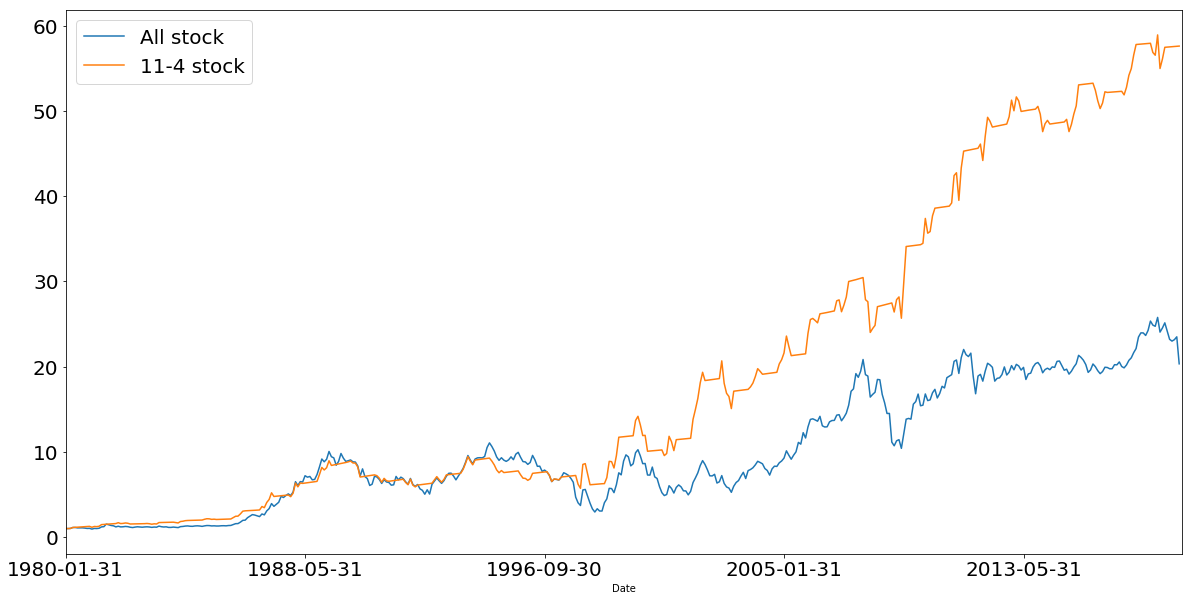

In [13]:
(df.set_index('Date')[['1년 투자 자산', '11-4월 투자 자산']]
   .rename({'1년 투자 자산': 'All stock', '11-4월 투자 자산': '11-4 stock'}, axis='columns')
   .plot(figsize=(20, 10), fontsize=20));

그래프에서 보듯, 11-4월만 투자하면 60배의 이득, 전체를 주식으로 가지고 있으면 20배의 이득이네요.

이제 최대 손실 (MDD: Maximum DrawDown) 을 계산해보죠.

In [14]:
df['MAX 1년'] = df['1년 투자 자산'].cummax()
df['MAX 6개월'] = df['11-4월 투자 자산'].cummax()
df['최대 손실 1년'] = ((df['1년 투자 자산'] / df['MAX 1년']) - 1) * 100
df['최대 손실 6개월'] = ((df['11-4월 투자 자산'] / df['MAX 6개월']) - 1) * 100
print('최대 손실 1년: {:.2f}%'.format(df['최대 손실 1년'].min()))
print('최대 손실 6개월: {:.2f}%'.format(df['최대 손실 6개월'].min()))

최대 손실 1년: -73.11%
최대 손실 6개월: -39.24%


결론:
* 수익률: 6개월투자를 하면 57배, 주식몰빵이면 20배 (KOSPI 지수가 2000 이겠죠?) 입니다.
* MDD: 주식몰빵이 73% vs 40%로 안좋아요. 73% 손실은 IMF 기간에 났겠죠.
* 변동성: 계산은 안했지만 당연히 주식몰빵이 더 안좋죠.

## KOSPI 에서 같은 전략을 구간을 나눠서 해보자. 왜냐? IMF 이후에 금리가 왕창 낮아졌기에 그 효과를 알아보려고...

구간을 1980~2018, 1999~2018로 나눕니다. 우선, 1999~2018에 대한 차트를 그려볼까요?

In [15]:
df2 = df.loc[228:].reset_index(drop=True)
df2['1년 투자 자산'] = (df2['월별 투자 수익률'] / 100 + 1).cumprod()
df2['11-4월 투자 자산'] = (df2['11-4월 수익'] / 100 + 1).cumprod()
df2.tail()

,Date,Open,High,Low,Close,예금금리,월,월별 투자 수익률,11-4월 수익,1년 투자 자산,11-4월 투자 자산,MAX 1년,MAX 6개월,최대 손실 1년,최대 손실 6개월
234,2018-07-31,2322.23,2327.46,2245.17,2295.26,0.041667,7,-0.906887,0.041667,3.999183,6.447869,25.7891,58.898637,-10.769666,-2.345743
235,2018-08-31,2301.17,2322.88,2218.70,2322.88,0.041667,8,0.728325,0.041667,4.028310,6.450555,25.7891,58.898637,-10.119779,-2.305054
236,2018-09-28,2317.93,2356.62,2265.43,2343.07,0.041667,9,1.439215,0.041667,4.086286,6.453243,25.7891,58.898637,-8.826210,-2.264348
237,2018-10-31,2351.29,2351.62,1985.95,2029.69,0.041667,10,-13.447086,0.041667,3.536800,6.455932,25.7891,58.898637,-21.086428,-2.223624
238,2018-11-30,2035.11,2136.74,2023.82,2096.86,0.041667,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


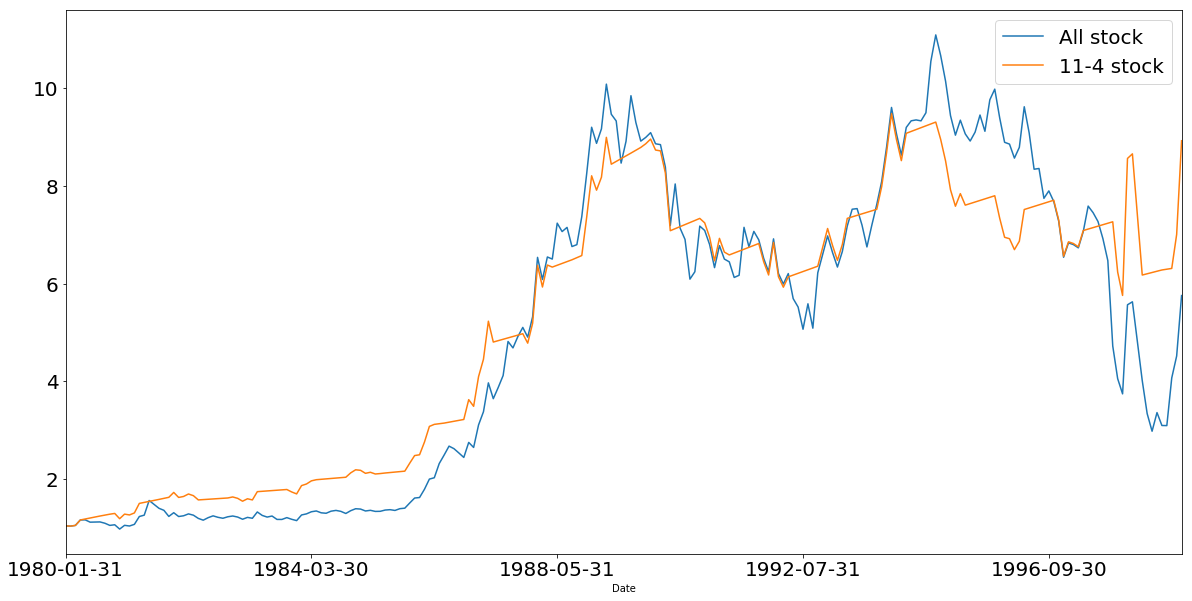

In [16]:
(df.loc[:227].set_index('Date')[['1년 투자 자산', '11-4월 투자 자산']]
             .rename({'1년 투자 자산': 'All stock', '11-4월 투자 자산': '11-4 stock'}, axis='columns')
             .plot(figsize=(20, 10), fontsize=20));

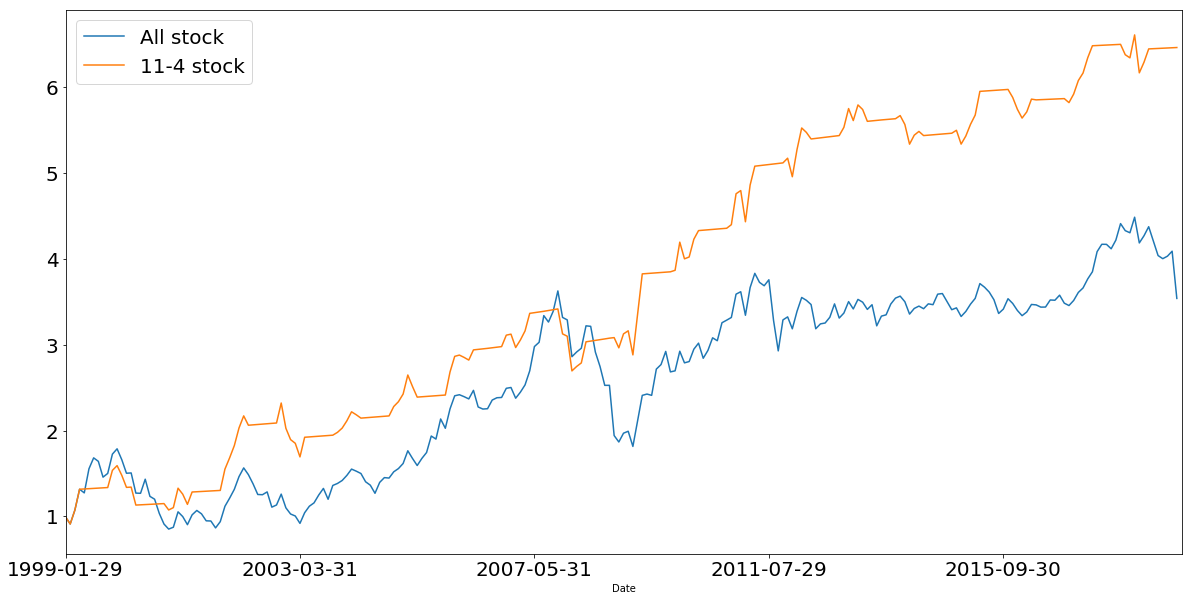

In [17]:
(df2.set_index('Date')[['1년 투자 자산', '11-4월 투자 자산']]
    .rename({'1년 투자 자산': 'All stock', '11-4월 투자 자산': '11-4 stock'}, axis='columns')
    .plot(figsize=(20, 10), fontsize=20));

강의에서는 말씀하지 않으신 차트로 보니 새롭네요. 1997년 정도까지는 사실 6개월 전략이 잘 안먹힌 것 같습니다.

하지만, 두 그래프를 비교해보면 99년 부터는 확연히 잘 먹어서, 99년 이후에만 봐도 3.5배 vs 6.5배로 잘 먹혔네요.

강의에서 비교해주신 것 처럼, 복리, 변동성을 비교해도 의미가 있을 것 같습니다. 강의에서의 결론은 복리도 좋아지고, 변동성은 낮아진다였죠. (당연히 주식보유기간이 짧아지니 변동성도 훨씬 좋아집니다.)

## 세계 데이터 분석

그럼 이제 세계 데이터를 분석해 봅시다. [AQR Data library](https://www.aqr.com/Insights/Datasets/Quality-Minus-Junk-Factors-Monthly) 에서 데이터를 받으세요.

In [18]:
! wget https://images.aqr.com/-/media/AQR/Documents/Insights/Data-Sets/Quality-Minus-Junk-Factors-Monthly.xlsx 2&>1 >/dev/null

In [19]:
filepath = 'Quality-Minus-Junk-Factors-Monthly.xlsx'
mkt = pd.read_excel(filepath, sheet_name='MKT', skiprows=18).set_index('DATE').loc['01/31/1986':]
mkt.head() 

,AUS,AUT,BEL,CAN,CHE,DEU,DNK,ESP,FIN,FRA,...,NZL,PRT,SGP,SWE,USA,Global,Global Ex USA,Europe,North America,Pacific
DATE,,,,,,,,,,,,,,,,,,,,,
01/31/1986,0.112382,-0.002635,-0.022586,-0.033210,-0.064109,0.016342,-0.075908,0.123980,0.098906,0.082684,...,0.070892,NaN,-0.006549,0.066354,0.003507,0.010065,0.017875,0.008343,0.001892,0.029601
02/28/1986,-0.057001,0.048098,0.237822,-0.001810,0.043871,0.045992,0.109200,0.238829,0.033527,0.168422,...,0.046954,NaN,0.050356,0.082395,0.066030,0.080836,0.098312,0.106005,0.063101,0.102516
03/31/1986,0.110014,-0.042386,0.015242,0.068429,0.037040,0.032163,-0.010497,0.206989,0.045072,0.094115,...,0.156393,NaN,-0.074158,0.122865,0.050046,0.083046,0.120432,0.082903,0.050787,0.150912
04/30/1986,0.096889,0.224597,0.126305,0.022635,0.095080,0.125315,0.035108,0.152075,0.146294,0.127341,...,0.195019,NaN,-0.025393,0.080793,-0.013193,0.025888,0.067515,0.087504,-0.011730,0.057980
05/31/1986,-0.016901,-0.085894,-0.049784,0.006006,-0.075997,-0.155692,-0.127618,-0.048986,-0.086418,-0.151142,...,-0.043602,NaN,0.095045,0.005333,0.046135,0.003651,-0.037515,-0.094156,0.044448,-0.003020


In [20]:
rf = pd.read_excel(filepath, sheet_name='RF', skiprows=18).set_index('DATE').loc['01/31/1986':]
rf.head()

,Risk Free Rate
DATE,
01/31/1986,0.005875
02/28/1986,0.005808
03/31/1986,0.005850
04/30/1986,0.005283
05/31/1986,0.005083


1986년부터 2018년까지의 데이터를 합쳐서 df 라고 하죠.

우리는 'Global', 'Global Ex USA', 'Europe', 'North America', 'Pacific' 만 계산해보죠.

In [21]:
mkt = mkt.loc['01/31/1986':]
rf = rf.loc['01/31/1986':]
df = mkt.join(rf)
df = df[['Global', 'Global Ex USA', 'Europe', 'North America', 'Pacific', 'Risk Free Rate']]
df.head()

,Global,Global Ex USA,Europe,North America,Pacific,Risk Free Rate
DATE,,,,,,
01/31/1986,0.010065,0.017875,0.008343,0.001892,0.029601,0.005875
02/28/1986,0.080836,0.098312,0.106005,0.063101,0.102516,0.005808
03/31/1986,0.083046,0.120432,0.082903,0.050787,0.150912,0.005850
04/30/1986,0.025888,0.067515,0.087504,-0.011730,0.057980,0.005283
05/31/1986,0.003651,-0.037515,-0.094156,0.044448,-0.003020,0.005083


위에서 한것처럼 1년 투자자산, 6개월 투자자산, 1년 최대손실, 6개월 최대손실을 구해봅시다.

In [22]:
df['월'] = df.index.map(lambda d: int(d.split('/')[0]))
for region in set(df.columns) - set('Risk Free Rate'):
    df[region + ' 수익'] = np.where((df['월'] > 4) & (df['월'] < 11), df['Risk Free Rate'], df[region])
    df[region + ' 1년 투자자산'] = (df[region] + 1).cumprod()
    df[region + ' 6개월 투자자산'] = (df[region + ' 수익'] + 1).cumprod()
    df[region + ' MAX 1년'] = df[region + ' 1년 투자자산'].cummax()
    df[region + ' MAX 6개월'] = df[region + ' 6개월 투자자산'].cummax()
    df[region + ' 최대손실 1년'] = ((df[region + ' 1년 투자자산'] / df[region + ' MAX 1년']) - 1) * 100
    df[region + ' 최대손실 6개월'] = ((df[region + ' 6개월 투자자산'] / df[region + ' MAX 6개월']) - 1) * 100
    print(region + ' 최대손실 1년: {:.2f}%'.format(df[region + ' 최대손실 1년'].min()))
    print(region + ' 최대손실 6개월: {:.2f}%'.format(df[region + ' 최대손실 6개월'].min()))

Global 최대손실 1년: -55.49%
Global 최대손실 6개월: -27.61%
Pacific 최대손실 1년: -74.41%
Pacific 최대손실 6개월: -49.02%
Europe 최대손실 1년: -60.16%
Europe 최대손실 6개월: -27.60%
월 최대손실 1년: -290.01%
월 최대손실 6개월: -0.00%
Global Ex USA 최대손실 1년: -57.55%
Global Ex USA 최대손실 6개월: -32.75%
North America 최대손실 1년: -53.22%
North America 최대손실 6개월: -30.28%
Risk Free Rate 최대손실 1년: -0.00%
Risk Free Rate 최대손실 6개월: -0.00%


강의에서 말씀하시길, <span style="color:red">**Pacific 에서 6개월 전략이 그닥 효과적이지 않았다**</span> 가 여기서도 보이네요. 80년대 일본이 망해서 Pacific 이 이모양이라는데요. 그래프로 한번 볼까요?

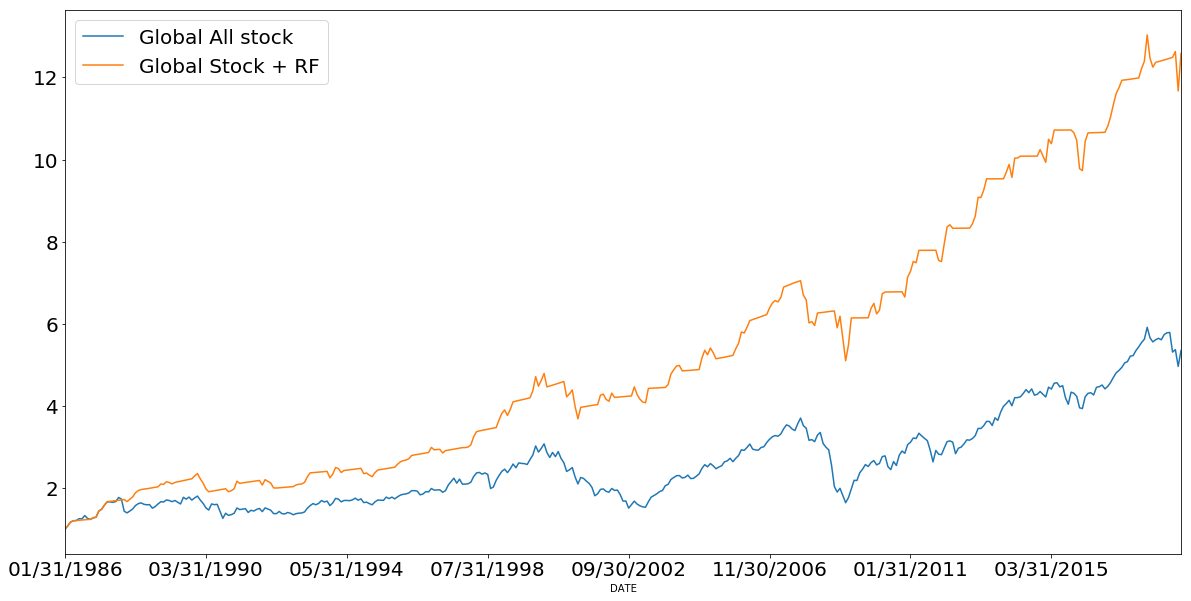

In [23]:
(df[['Global 1년 투자자산', 'Global 6개월 투자자산']]
   .rename({'Global 1년 투자자산': 'Global All stock', 'Global 6개월 투자자산': 'Global Stock + RF'}, axis='columns')
   .plot(figsize=(20, 10), fontsize=20));

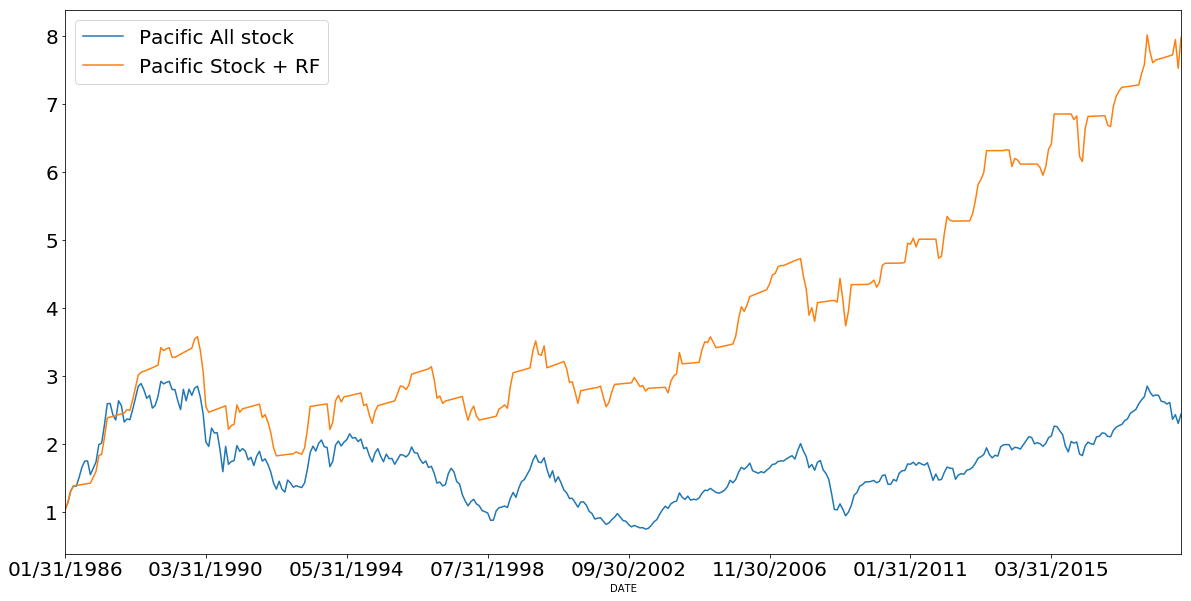

In [24]:
(df[['Pacific 1년 투자자산', 'Pacific 6개월 투자자산']]
   .rename({'Pacific 1년 투자자산': 'Pacific All stock', 'Pacific 6개월 투자자산': 'Pacific Stock + RF'}, axis='columns')
   .plot(figsize=(20, 10), fontsize=20));

그래프에서는 보기 잘 힘들지만, 아무래도 90년 전후에서 MDD 가 큰 것 같죠? 다시 그려볼까요?

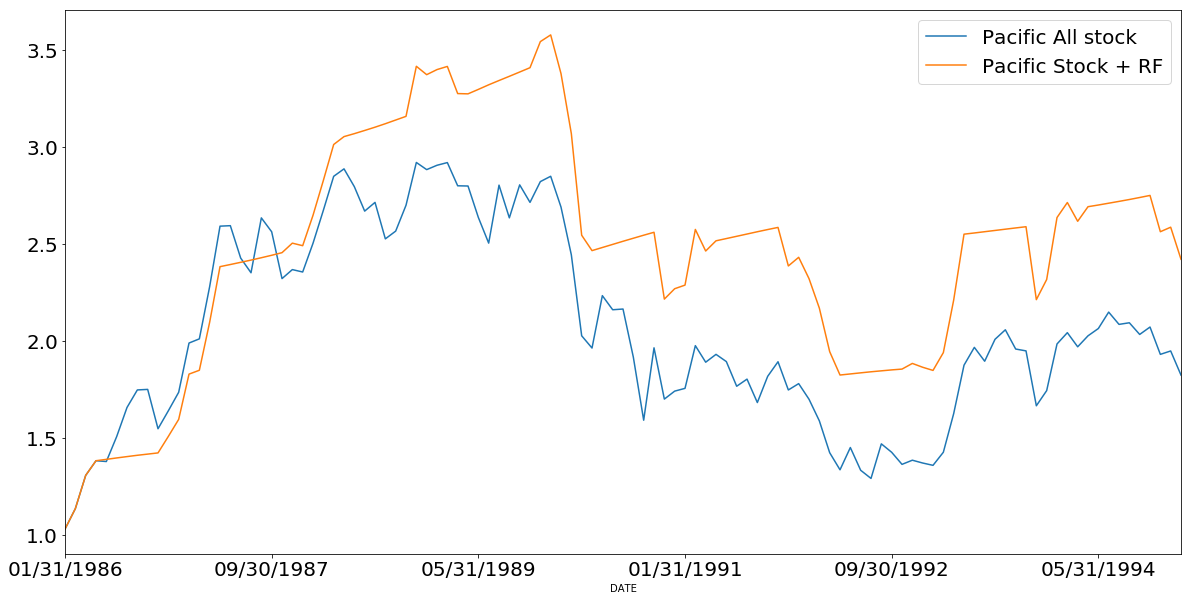

In [25]:
(df[['Pacific 1년 투자자산', 'Pacific 6개월 투자자산']].loc[:'01/31/1995']
   .rename({'Pacific 1년 투자자산': 'Pacific All stock', 'Pacific 6개월 투자자산': 'Pacific Stock + RF'}, axis='columns')
   .plot(figsize=(20, 10), fontsize=20));

이 그래프에서는 대충 나오네요. Pacific + RF 에서 보면 89~90년 근처에 4.0으로 최고점을 찍다가 92년 근처에 2.0근처까지 떨어지네요.

두 전략상관없이 비슷하게 떨어지는 것을 보면 일본 (대세가) 망해서 전략에 상관없이 전부 폭망한것으로 보입니다. MDD 안습.

강의에서는 나라별로 그래프를 그려보네요. 우리는 그냥 대륙별 전체 그래프를 보면서 마무리하죠.

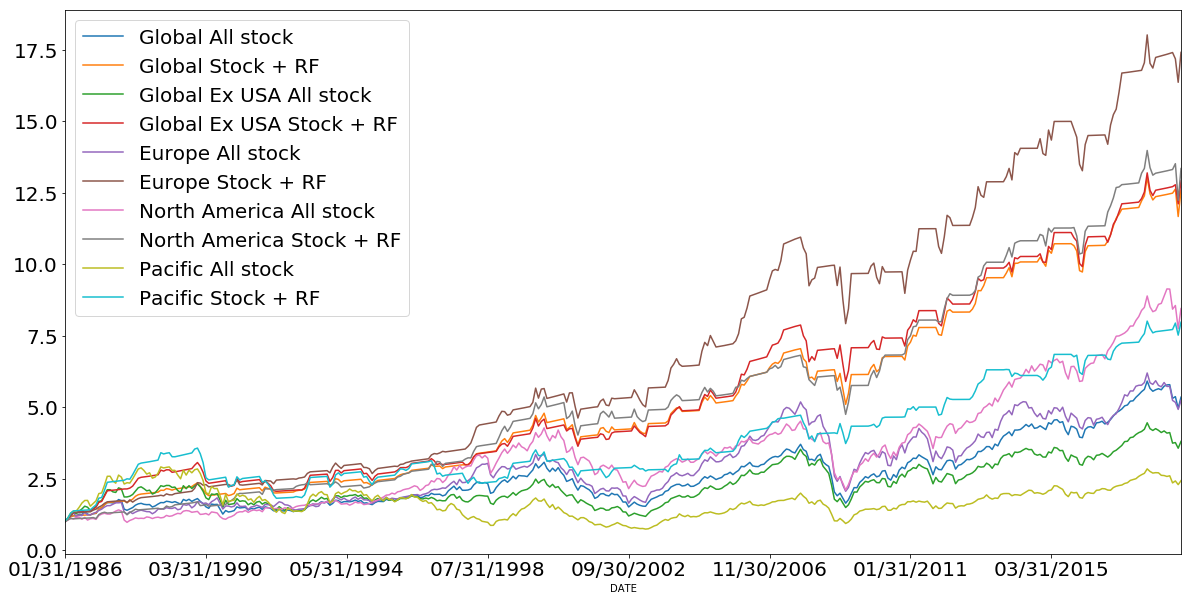

In [26]:
(df[['Global 1년 투자자산', 'Global 6개월 투자자산',
     'Global Ex USA 1년 투자자산', 'Global Ex USA 6개월 투자자산',
     'Europe 1년 투자자산', 'Europe 6개월 투자자산',
     'North America 1년 투자자산', 'North America 6개월 투자자산',
     'Pacific 1년 투자자산', 'Pacific 6개월 투자자산',]]
   .rename({'Global 1년 투자자산': 'Global All stock',
            'Global 6개월 투자자산': 'Global Stock + RF',
            'Global Ex USA 1년 투자자산': 'Global Ex USA All stock',
            'Global Ex USA 6개월 투자자산': 'Global Ex USA Stock + RF',
            'Europe 1년 투자자산': 'Europe All stock',
            'Europe 6개월 투자자산': 'Europe Stock + RF',
            'North America 1년 투자자산': 'North America All stock',
            'North America 6개월 투자자산': 'North America Stock + RF',
            'Pacific 1년 투자자산': 'Pacific All stock',
            'Pacific 6개월 투자자산': 'Pacific Stock + RF'},
           axis='columns')
   .plot(figsize=(20, 10), fontsize=20));

## 결론

* 한국: 6개월 투자가 1년 투자보다 항상 좋음. 수익률 + 변동성 + MDD 전부
* 세계: 일반적으로 거의 다 먹힘!
    * 유럽에서는 6개월 투자가 아주 좋음 (바로 위 차트 제일 높이 올라가는 놈)
    * 아시아에서는 (일본때문에) 별로지만 그래도 6개월이나 1년내내 주식 들고있는거나 비슷.
* Takeaway: 6개월이나 1년이나 수익률이 비슷하다고 하자. 6개월만 들고 있는게 변동성이 확 줄어드니깐, <span style="color:red">**수익이 비슷하다고 해도 6개월만 들고 있는것이 마음의 안정에 좋음!**</span>

## 앞으로 할일

* [32강의](https://www.youtube.com/watch?v=k_khgxL4pLs) 의 마지막에 중요한것을 두개 말씀하심: (1) 11월 매수, 4월 매도, (2) 모멘텀을 보고 매수/매도시기 약간 조정
* 이번 강의에서는 11월 매수/4월 매도가 먹힘을 데이터로 알아봄
* [43강의](https://www.youtube.com/watch?v=ki73Ky08hMs) 에서 <span style="color:red">**모멘텀을 계산하는 프로그램을 만들어두고 매월 돌려보자!**</span>